### Patrick Horlaville (260931235) - Problem Set 2 - PHYS 641 : Observational Techniques in Modern Astrophysics


Prof: Jon Sievers. TA: Anan Lu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc,rcParams
from matplotlib.ticker import ScalarFormatter

First we define a function that solves the least-squares fit parameters using the classical linear least squares

In [3]:
def classical(A, N, d):
    
    At = A.T
    N_1 = np.linalg.inv(N)
    
    At_N1_A = np.dot(At, np.dot(N_1, A))
    At_N1_d = np.dot(At, np.dot(N_1, d))

    m = np.dot(np.linalg.inv(At_N1_A), At_N1_d)
    
    return m

Next we define the function that solves the least-squares fit parameters using the QR decomposition linear least-squares

In [4]:
def QR(A, N, d):
    
    Q, R = np.linalg.qr(A)
    Qt = Q.T
    N_1 = np.linalg.inv(N)

    Qt_N1_Q_R = np.dot(Qt, np.dot(N_1, np.dot(Q, R)))
    Qt_N1_d = np.dot(Qt, np.dot(N_1, d))

    m = np.dot(np.linalg.inv(Qt_N1_Q_R), Qt_N1_d)
    
    return m

Now, we can try to perform a fit using both methods on the same function at different orders and try to see how both methods' performance compare

We will fit over the function 

In [85]:
def funct(x):
    return np.sin(x)*np.exp(-x)

In [86]:
x_funct = np.linspace(0, 5, 100)
y_funct = funct(x_funct)

Text(0.5, 1.0, 'True function')

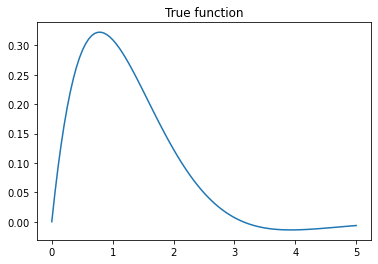

In [87]:
plt.plot(x_funct, y_funct)
plt.title('True function')

To make things easier we can make a function that will directly compute the parameters' solutions for a given x range and a given fit order for our function

In [88]:
def comp_fits(x, order):
    
    n = len(x)
    
    A = np.zeros([n, order + 1])
    for i in range(order + 1):
        A[:,i] = x**i
    
    y = funct(x)
    
    m_classical = classical(A, np.eye(n), y)   
    y_classical = np.dot(A, m_classical)
    
    m_qr = QR(A, np.eye(n), y)
    y_qr = np.dot(A, m_qr)
    
    return y_classical, y_qr

First, try a low order fit on our function

In [92]:
y_cl5, y_qr5 = comp_fits(x_funct, 5)

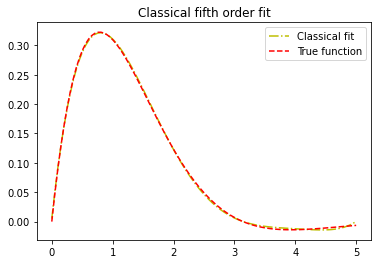

In [145]:
plt.plot(x_funct, y_cl5, ls = '-.', color = 'y', label = 'Classical fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('Classical fifth order fit')
plt.legend()

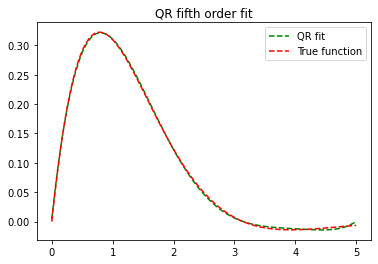

In [95]:
plt.plot(x_funct, y_qr5, ls = '--', color = 'g', label = 'QR fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('QR fifth order fit')
plt.legend()

Both fits are well behaved

Now, we can try higher order fits

In [96]:
y_cl50, y_qr50 = comp_fits(x_funct, 50)

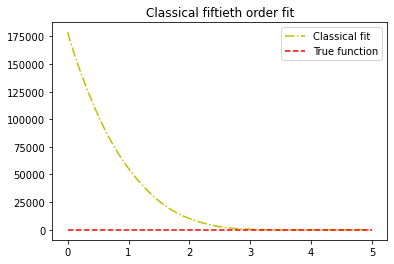

In [144]:
plt.plot(x_funct, y_cl50, ls = '-.', color = 'y', label = 'Classical fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('Classical fiftieth order fit')
plt.legend()

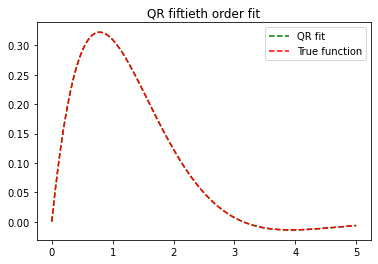

In [100]:
plt.plot(x_funct, y_qr50, ls = '--', color = 'g', label = 'QR fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('QR fiftieth order fit')
plt.legend()

Hence, there are cases where the classical fit breaks and the QR fit behaves correctly

## Problem 2

a)

First, we perform a Chebyshev polynomial fit over the exponential function at various orders and check how well behaved the fit is. We define the function to perform the Chebyshev fit over:

In [101]:
def cheby(x, y, order):
    
    A = np.polynomial.chebyshev.chebvander(x, order)
    m = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))
    
    y_fit = np.dot(A, m)
    
    return y_fit

We fit over the exponential function up to 5th order for now:

In [115]:
x_exp = np.linspace(-1, 1, 500)
y_exp = np.exp(x_exp)
y_fit5 = cheby(x_exp, y_exp, 5)

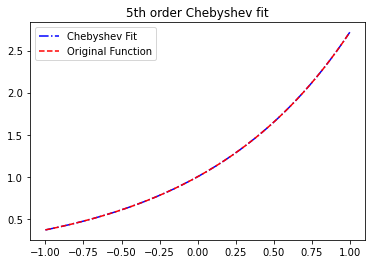

In [116]:
plt.plot(x_exp, y_fit5, ls = '-.', color = 'b', label = 'Chebyshev Fit')
plt.plot(x_exp, y_exp, ls = '--', color = 'r', label = 'Original Function')
plt.title('5th order Chebyshev fit')
plt.legend()

It's well behaved !

Now let's try order 50:

In [117]:
x_exp = np.linspace(-1, 1, 500)
y_exp = np.exp(x_exp)
y_fit50 = cheby(x_exp, y_exp, 50)

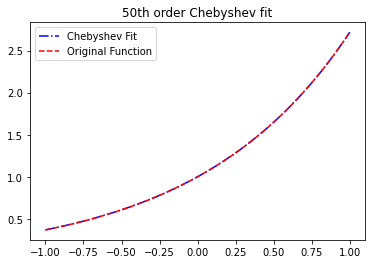

In [118]:
plt.plot(x_exp, y_fit50, ls = '-.', color = 'b', label = 'Chebyshev Fit')
plt.plot(x_exp, y_exp, ls = '--', color = 'r', label = 'Original Function')
plt.title('50th order Chebyshev fit')
plt.legend()

Still well behaved!

b)

First, we perform a 6th order Chebyshev fit and we look at our RMS error

In [141]:
y_fit6 = cheby(x_exp, y_exp, order = 6)

rms_6 = np.sqrt(np.mean((y_exp - y_fit6)**2))
max_err_6 = np.max(np.abs(y_exp - y_fit6))

print('Our RMS error on the 6th order fit is', rms_6)
print('The maximum error on this fit is', max_err_6)

Our RMS error on the 6th order fit is 1.9989644962168915e-06
The maximum error on this fit is 7.813870829487257e-06


Now we would like to perform a much higer order fit, but we will truncate the coefficients, so we need to extract the coefficients of our fit. We can keep using our 50th order fit.

In [123]:
def cheby_coefs(x, y, order):
    
    A = np.polynomial.chebyshev.chebvander(x, order)
    m = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))
    
    return m

In [126]:
m_fit50 = cheby_coefs(x_exp, y_exp, 50)
m_fit50_trunc = m_fit50[0:7]

In [130]:
m_fit50_trunc = m_fit50[0:7]

In [134]:
y_fit50_trunc = np.dot(np.polynomial.chebyshev.chebvander(x_exp, 6), m_fit50_trunc)

In [137]:
rms_trunc = np.sqrt(np.mean((y_exp - y_fit50_trunc)**2))
max_err_trunc = np.max(np.abs(y_exp - y_fit50_trunc))

print('Our RMS error on the 50th truncated order fit is', rms_trunc)
print('The maximum error on this fit is', max_err_trunc)

Our RMS error on the 50th truncated order fit is 2.2601971374702084e-06
The maximum error on this fit is 3.4092623670822775e-06


What could we have predicted the maximum error to be? As explained by the problem, we can just sum up the absolute values of the coefficients of the Chebyshev fit we truncated:

In [139]:
max_err_th = np.sum(np.abs(m_fit50[7:]))
print('Our predicted estimate for the maximum error is', max_err_th)

Our predicted estimate for the maximum error is 3.409262364631113e-06


Our estimate is pretty close to our actual maximum error!

In [143]:
rms_change = ((rms_trunc - rms_6)/rms_6) * 100
maxerr_change = ((max_err_trunc - max_err_6)/max_err_6)*100

print('Our RMS has increased by ', rms_change, '%')
print('Our max error has increased by ', maxerr_change, '%')

Our RMS has increased by  13.06839825057967 %
Our max error has increased by  -56.36909744890175 %


So our RMS has increased by 13% approximately (close to 15%!) and our max error has decreased by more than 50% (so the max error went down by more than a factor of 2 indeed!)

## Problem 3

We want to generate random correlated data by taking the eigenvalues/eigenvectors of a noise matrix, and show that if we average over many realizations, then $<d d^T>$ converges to the noise matrix

First we want to be able to generate correlated noise with SVD 

In [146]:
def corr_noise_svd(N, nsim):
    
    ndim = N.shape[0]
    
    u, s, v = np.linalg.svd(N, 1)
    lamb = np.zeros(shape = (ndim, ndim), dtype = np.float64)
    np.fill_diagonal(lamb, np.sqrt(s))
    
    d = np.random.randn(ndim, nsim)
    data = np.zeros((ndim, ndim, d.shape[-1]))
    
    for i in range(nsim):
        d_new = np.dot(np.dot(v.T, lamb), d[:,i])
        data[:,:,i] = np.outer(d_new, d_new)
    
    return data

Now we can use Jon's example of a noise matrix with 1's everywhere except on the diagonal where it's 2. We would like to generate correlated data with this noise matrix and check if its average over numerous realizations converge to the noise matrix. Here we use a 4x4 noise matrix.

In [155]:
N_ex = np.ones(shape = (4, 4), dtype = np.float64)
np.fill_diagonal(N_ex, N_ex.diagonal() + 1)

# Get simulated correlated noise matrices
data = corr_noise_svd(N_ex, 100000)
N_new = np.mean(data, axis = -1)

In [156]:
print(N_new)
print('Should converge towards:')
print(N_ex)

[[2.00306115 0.99729209 1.00776764 1.00617886]
 [0.99729209 1.99144211 0.99816749 0.99595393]
 [1.00776764 0.99816749 2.00150761 1.00136084]
 [1.00617886 0.99595393 1.00136084 2.00810972]]
Should converge towards:
[[2. 1. 1. 1.]
 [1. 2. 1. 1.]
 [1. 1. 2. 1.]
 [1. 1. 1. 2.]]


Just as expected!

## Problem 4

a)

On a range of a 1000 points, we want to generate the noise matrix for various values of $a$ and $\sigma$ (parameters in the noise matrix expression as shown in the problem set) to be used on a gaussian signal, and use it to report the error bar on the fit amplitude.

We have :

In [171]:
x_range = np.linspace(0, 999, 1000)
a_arr = np.array([0.1, 0.5, 0.9])
sig_arr = np.array([5, 50, 500])
sig_src = 50

Our source is a gaussian signal. we define the model A as the signal:

In [172]:
A = np.exp(-(x_range - x_range[int(len(x_range)/2)])**2/(2*sig_src**2))

Now we will, for each $a$ and $\sigma$ value, compute the error on the fit; so we will build a grid for our x-ranges to be used on each fit. 

In [192]:
x_range_i, x_range_j = np.meshgrid(x_range, x_range)

In [229]:
m_errs = np.empty(shape = (len(a_arr), len(sig_arr)), dtype = np.float64)
for i in range(len(a_arr)):
    for j in range(len(sig_arr)):

        N = a_arr[i] * np.exp(-(x_range_i - x_range_j)**2 / (2*(sig_arr[j])**2)) + (1 - a_arr[i])*np.eye(len(x_range))
        Ninv = np.linalg.inv(N)
        
        m = (1/(A[:,np.newaxis].T@Ninv@A))*(A[:,np.newaxis].T@Ninv@A)
        
        m_errs[i,j] = np.sqrt((1/(A[:,np.newaxis].T@Ninv@A))[0])

In [234]:
print("We have the following error matrix (rows = different a's, columns = different sigma's)")
print(m_errs)

We have the following error matrix (rows = different a's, columns = different sigma's)
[[0.15576335 0.3377449  0.12757499]
 [0.27599935 0.71405448 0.10066392]
 [0.35789526 0.94993195 0.04892549]]


In [235]:
print('For sigma = 5, a = 0.5, error on m is found to be', m_errs[1,0])

For sigma = 5, a = 0.5, error on m is found to be 0.27599935080333926


Which is essentially 0.276 for the sanity check

b)

Notice that the greatest error is achieved at the third row, second column (with an error of about 0.95), which corresponds to a = 0.9 and $\sigma$ = 50.

Similarly, the smallest error is achieved at the third row, third column (with an error of about 0.05), which corresponds to a = 0.9 and $\sigma$ = 500.

We should be worried about correlated noise that operates on the same scale as the spread of the signal, here about $\sigma$ = 50. If the noise is highly correlated, peak structures will form on the scale of the signal. If the noise is more spread, then the signal is not washed away as the structures are now on different scales. This comes from the properties of a and $\sigma$, which are respectively the parameters that dictate how correlated the noise is and on what scale.